# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

# 0. Setup

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

# 1. Visit Website and Scrape Data

### 1.1 Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### 1.2 Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
table = html_soup.find('table', class_='table')

### 1.3 Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_facts = []
rows = table.find_all('tr', class_='data-row')

# Loop through the rows
for row in rows:
    current_row = []
    
    for element in row.find_all('td'):
        current_row.append(element.text)
    
    mars_facts.append(current_row)

# 2. Create Pandas DF and Clean

### 2.1 Create DF

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_facts, columns =['ID', 'Earth_Date', 'Martian_Days', 'Solar_Longitude', 'Martian_Month',
                                        'Min_Temp', 'Pressure'])
df.head()

,ID,Earth_Date,Martian_Days,Solar_Longitude,Martian_Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
print(df.shape)

(1867, 7)


### 2.2 Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               1867 non-null   object
 1   Earth_Date       1867 non-null   object
 2   Martian_Days     1867 non-null   object
 3   Solar_Longitude  1867 non-null   object
 4   Martian_Month    1867 non-null   object
 5   Min_Temp         1867 non-null   object
 6   Pressure         1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
df = df.astype({'Martian_Days': int, 'Solar_Longitude': int, 'Martian_Month': int, 'Min_Temp': float,
                'Pressure': float}, errors='raise')
df['Earth_Date'] = pd.to_datetime(df.Earth_Date)
df.head()

,ID,Earth_Date,Martian_Days,Solar_Longitude,Martian_Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               1867 non-null   object        
 1   Earth_Date       1867 non-null   datetime64[ns]
 2   Martian_Days     1867 non-null   int64         
 3   Solar_Longitude  1867 non-null   int64         
 4   Martian_Month    1867 non-null   int64         
 5   Min_Temp         1867 non-null   float64       
 6   Pressure         1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


# 3. Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


### 3.1 How many months are there on Mars?

In [12]:
# reference: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
n = len(pd.unique(df['Martian_Month']))
print(f"There are {n} months on Mars")

There are 12 months on Mars


### 3.2 How many Martian days' worth of data are there?

In [13]:
n = df['Martian_Days'].max()
print(f"There are {n} Martian days' worth of data")

There are 1977 Martian days' worth of data


### 3.3 What is the average low temperature by month?

#### 3.3.1 Calculate

In [14]:
df_min_temp = df[['Martian_Month', 'Min_Temp']]
df_min_temp_2 = df_min_temp.groupby('Martian_Month').mean().reset_index()
df_min_temp_2

,Martian_Month,Min_Temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


#### 3.3.2 Plot

Text(0.5, 1.0, 'Average Min Temp by Martian Month')

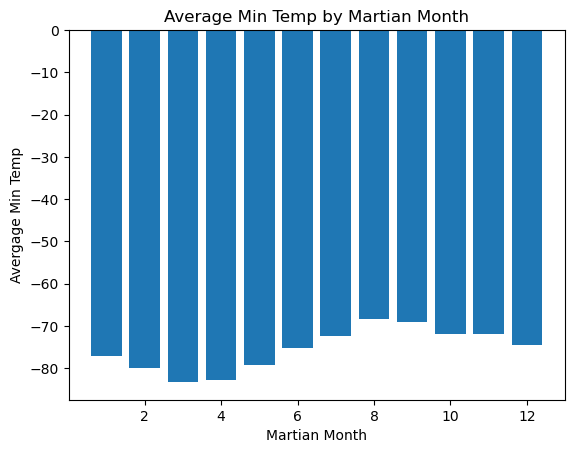

In [15]:
# Plot the average temperature by month
plt.bar(df_min_temp_2['Martian_Month'], df_min_temp_2['Min_Temp'])

plt.xlabel('Martian Month')
plt.ylabel('Avergage Min Temp')
plt.title('Average Min Temp by Martian Month')

#### 3.3.3 Identify Coldest and Warmest Months

In [16]:
# reference: https://stackoverflow.com/questions/37625334/convert-month-int-to-month-name-in-pandas
df_min_temp_2['Martian_Month'] = pd.to_datetime(df_min_temp_2['Martian_Month'], format='%m').dt.month_name()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
df_min_temp_3 = df_min_temp_2.sort_values('Min_Temp', ascending = True).reset_index(drop=True)
df_min_temp_3

,Martian_Month,Min_Temp
0,March,-83.307292
1,April,-82.747423
2,February,-79.932584
3,May,-79.308725
4,January,-77.160920
5,June,-75.299320
6,December,-74.451807
7,July,-72.281690
8,November,-71.985507
9,October,-71.982143


In [18]:
cold = df_min_temp_3['Martian_Month'][0]

length = len(df_min_temp_3) - 1
hot = df_min_temp_3['Martian_Month'][length]

print(f"The hottest month in Curiosity's location was {hot} and the coldest month was {cold}")

The hottest month in Curiosity's location was August and the coldest month was March


### 3.4 Average pressure by Martian month

#### 3.4.1 Calculate

In [19]:
df_pressure = df[['Martian_Month', 'Pressure']]
df_pressure_2 = df_pressure.groupby('Martian_Month').mean().reset_index()
df_pressure_2

,Martian_Month,Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


#### 3.4.2 Plot

Text(0.5, 1.0, 'Average Pressure by Martian Month')

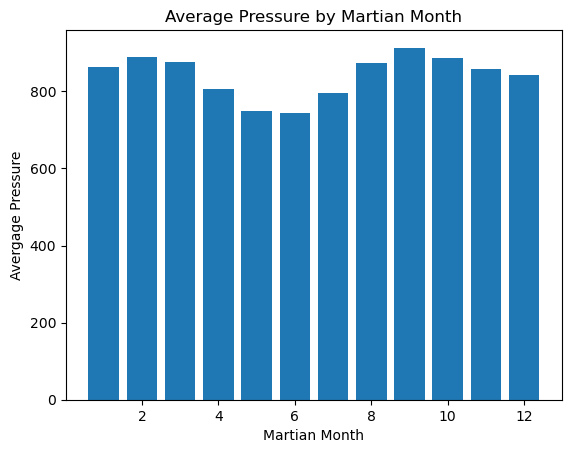

In [20]:
# Plot the average pressure by month
plt.bar(df_pressure_2['Martian_Month'], df_pressure_2['Pressure'])

plt.xlabel('Martian Month')
plt.ylabel('Avergage Pressure')
plt.title('Average Pressure by Martian Month')

#### 3.4.3 Months with Highest and Lowest Average Pressure

In [21]:
# reference: https://stackoverflow.com/questions/37625334/convert-month-int-to-month-name-in-pandas
df_pressure_2['Martian_Month'] = pd.to_datetime(df_pressure_2['Martian_Month'], format='%m').dt.month_name()

In [22]:
df_pressure_3 = df_pressure_2.sort_values('Pressure', ascending = True).reset_index(drop=True)
df_pressure_3

,Martian_Month,Pressure
0,June,745.054422
1,May,748.557047
2,July,795.105634
3,April,806.329897
4,December,842.156627
5,November,857.014493
6,January,862.488506
7,August,873.829787
8,March,877.322917
9,October,887.312500


In [23]:
low = df_pressure_3['Martian_Month'][0]

length = len(df_pressure_3) - 1
high = df_pressure_3['Martian_Month'][length]

print(f"Atmospheric pressure is, on average, lowest in {low} and highest in {high}")

Atmospheric pressure is, on average, lowest in June and highest in September


### 3.5 How many terrestrial (earth) days are there in a Martian year?

Text(0.5, 1.0, 'Min Temp on Mars by Martian Days')

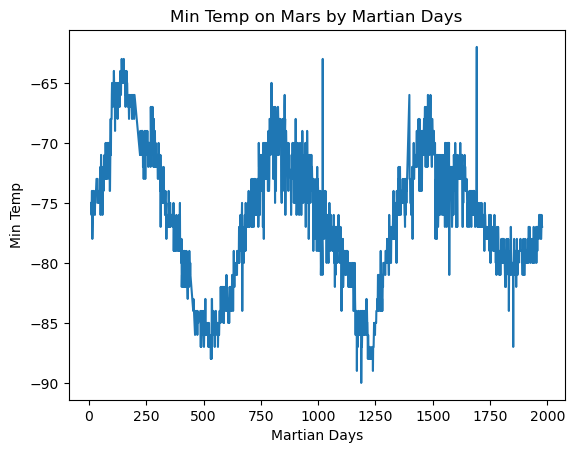

In [24]:
plt.plot(df['Martian_Days'], df['Min_Temp'])

plt.xlabel('Martian Days')
plt.ylabel('Min Temp')
plt.title('Min Temp on Mars by Martian Days')

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

# 4. Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
df.to_csv('Mars_Temp_Data.csv')

In [25]:
browser.quit()